# Análisis de precio de equipos moviles por marca, modelo y plan
**Autor:** Robinson Z.
**Dataset:** https://datosabiertos.gob.pe/dataset/precio-de-equipos-m%C3%B3viles-por-marca-modelo-y-plan-tarifario

## 1. Introducción
Este proyecto analiza datos de precios de equipos moviles segun marca, modelo y plan por trimestre para:
- observar la diferencia al analizar usando media y mediana con datos sesgados
- aprendizaje
- identificar la mejor medida de tendencia central para un mejor analisis

## 2. Carga y limpieza de datos

In [1]:
# importamos la libreria necesaria
import pandas as pd

In [5]:
# cargamos el dataset desde un CSV
df = pd.read_csv("PRECIO DE EQUIPOS MÓVILES POR MARCA, MODELO Y PLAN TARIFARIO.CSV", sep=';',encoding='ISO-8859-1')

In [6]:
# mostramos las primeras filas para entender la estructura
df.head()

,NUM,FECHA_CORTE,PERIODO,EMPRESA,TIPO_EMPRESA,PLAN,MODALIDAD_PLAN,ID_EQUIPO_MÓVIL,EQUIPO_MÓVIL,CAPACIDAD_GB,PANTALLA_PULGADAS,CÁMARA_PRINCIPAL,CÁMARA_FRONTAL,MARCA,PRECIO_SOLES
0,1,20240617,202303,Movistar,Empresa Operadora,Equipo Libre,Sin Plan,2,iPhone 11,64,6.1,12MP+12MP,12MP,Apple,2459.0
1,2,20240617,202303,Movistar,Empresa Operadora,29.90,Portabilidad,2,iPhone 11,64,6.1,12MP+12MP,12MP,Apple,2189.0
2,3,20240617,202303,Movistar,Empresa Operadora,39.90,Portabilidad,2,iPhone 11,64,6.1,12MP+12MP,12MP,Apple,2189.0
3,4,20240617,202303,Movistar,Empresa Operadora,55.90,Portabilidad,2,iPhone 11,64,6.1,12MP+12MP,12MP,Apple,2129.0
4,5,20240617,202303,Movistar,Empresa Operadora,69.90,Portabilidad,2,iPhone 11,64,6.1,12MP+12MP,12MP,Apple,2119.0


In [8]:
# comprobamos la existencia de datos nulos
df[df.isnull().any(axis=1)]

,NUM,FECHA_CORTE,PERIODO,EMPRESA,TIPO_EMPRESA,PLAN,MODALIDAD_PLAN,ID_EQUIPO_MÓVIL,EQUIPO_MÓVIL,CAPACIDAD_GB,PANTALLA_PULGADAS,CÁMARA_PRINCIPAL,CÁMARA_FRONTAL,MARCA,PRECIO_SOLES


In [9]:
df.isnull().sum()

NUM                  0
FECHA_CORTE          0
PERIODO              0
EMPRESA              0
TIPO_EMPRESA         0
PLAN                 0
MODALIDAD_PLAN       0
ID_EQUIPO_MÓVIL      0
EQUIPO_MÓVIL         0
CAPACIDAD_GB         0
PANTALLA_PULGADAS    0
CÁMARA_PRINCIPAL     0
CÁMARA_FRONTAL       0
MARCA                0
PRECIO_SOLES         0
dtype: int64

In [10]:
# revisamos la cantidad de datos unicos por columna
df.nunique()

NUM                  34280
FECHA_CORTE              1
PERIODO                  5
EMPRESA                 18
TIPO_EMPRESA             3
PLAN                    28
MODALIDAD_PLAN           4
ID_EQUIPO_MÓVIL        353
EQUIPO_MÓVIL           284
CAPACIDAD_GB             8
PANTALLA_PULGADAS       47
CÁMARA_PRINCIPAL       110
CÁMARA_FRONTAL          41
MARCA                   18
PRECIO_SOLES          1490
dtype: int64

In [11]:
# eliminamos la columna FECHA_CORTE
df = df.drop(['FECHA_CORTE'], axis=1)

In [12]:
# comprovamos que trimestres comprende la columna PERIODO el dataset
df['PERIODO'].unique()

array([202303, 202306, 202309, 202312, 202403])

In [13]:
# transformamos los datos de la columna PERIODO para un mejor manejo
df["AÑO"] = df["PERIODO"].astype(str).str[:4]
df["TRIMESTRE"] = df["PERIODO"].astype(str).str[4:]

trimestre_map = {"03": "T1", "06": "T2", "09": "T3", "12": "T4"}
df["TRIMESTRE"] = df["TRIMESTRE"].map(trimestre_map)

df.head()

,NUM,PERIODO,EMPRESA,TIPO_EMPRESA,PLAN,MODALIDAD_PLAN,ID_EQUIPO_MÓVIL,EQUIPO_MÓVIL,CAPACIDAD_GB,PANTALLA_PULGADAS,CÁMARA_PRINCIPAL,CÁMARA_FRONTAL,MARCA,PRECIO_SOLES,AÑO,TRIMESTRE
0,1,202303,Movistar,Empresa Operadora,Equipo Libre,Sin Plan,2,iPhone 11,64,6.1,12MP+12MP,12MP,Apple,2459.0,2023,T1
1,2,202303,Movistar,Empresa Operadora,29.90,Portabilidad,2,iPhone 11,64,6.1,12MP+12MP,12MP,Apple,2189.0,2023,T1
2,3,202303,Movistar,Empresa Operadora,39.90,Portabilidad,2,iPhone 11,64,6.1,12MP+12MP,12MP,Apple,2189.0,2023,T1
3,4,202303,Movistar,Empresa Operadora,55.90,Portabilidad,2,iPhone 11,64,6.1,12MP+12MP,12MP,Apple,2129.0,2023,T1
4,5,202303,Movistar,Empresa Operadora,69.90,Portabilidad,2,iPhone 11,64,6.1,12MP+12MP,12MP,Apple,2119.0,2023,T1


In [14]:
df.tail()

,NUM,PERIODO,EMPRESA,TIPO_EMPRESA,PLAN,MODALIDAD_PLAN,ID_EQUIPO_MÓVIL,EQUIPO_MÓVIL,CAPACIDAD_GB,PANTALLA_PULGADAS,CÁMARA_PRINCIPAL,CÁMARA_FRONTAL,MARCA,PRECIO_SOLES,AÑO,TRIMESTRE
34275,34276,202403,Real Plaza,Market Place,Equipo Libre,Sin Plan,178,12,256,6.280,50MP+13MP+5MP,32MP,Xiaomi,2879.2,2024,T1
34276,34277,202403,Real Plaza,Market Place,Equipo Libre,Sin Plan,289,Spark 10 Pro,256,6.800,32MP,"50MP+0,08MP",Tecno,699.0,2024,T1
34277,34278,202403,Real Plaza,Market Place,Equipo Libre,Sin Plan,291,Spark Go,64,6.600,5MP,13MP,Tecno,449.0,2024,T1
34278,34279,202403,Real Plaza,Market Place,Equipo Libre,Sin Plan,292,Pop7,64,6.600,5MP,"8MP+0,08MP",Tecno,590.0,2024,T1
34279,34280,202403,Real Plaza,Market Place,Equipo Libre,Sin Plan,301,Blade A72S,64,6.745,50 MP+5MP+2MP,5MP,ZTE,329.0,2024,T1


In [15]:
# eliminamos la columna PERIODO
df = df.drop(['PERIODO'], axis=1)

In [45]:
# revisamos los datos unicos de la columna PLAN
df['PLAN'].unique()

array(['Equipo Libre', '29.90', '39.90', '55.90', '69.90', '99.90',
       'Prepago', '49.90', '79.90', '95.00', '95.90', '109.90', '115.00',
       '145.00', '189.90', '289.90', '159.90', '59.90', '74.90', '89.90',
       'PrePago', '65.90', '105.90', '35.90', '45.90', '85.90', '114.90',
       '149.90'], dtype=object)

In [46]:
# homogenizamos los datos de la columna plan para juntar los datos 'Prepago' y 'PrePago' porque son lo mismo
df["PLAN"] = df["PLAN"].str.lower().str.strip()

El dataset contiene:
- **34,280 registros**
- Columnas sin relevancia: 'FECHA_CORTE'
- Columnas clave: 'AÑO', 'TRIMESTRE', 'MARCA', 'PLAN', 'EQUIPO_MOVIL', 'PRECIO_SOLES'
- Valores nulos: **0**

## 3. EDA

In [16]:
# informacion del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34280 entries, 0 to 34279
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NUM                34280 non-null  int64  
 1   EMPRESA            34280 non-null  object 
 2   TIPO_EMPRESA       34280 non-null  object 
 3   PLAN               34280 non-null  object 
 4   MODALIDAD_PLAN     34280 non-null  object 
 5   ID_EQUIPO_MÓVIL    34280 non-null  int64  
 6   EQUIPO_MÓVIL       34280 non-null  object 
 7   CAPACIDAD_GB       34280 non-null  int64  
 8   PANTALLA_PULGADAS  34280 non-null  float64
 9   CÁMARA_PRINCIPAL   34280 non-null  object 
 10  CÁMARA_FRONTAL     34280 non-null  object 
 11  MARCA              34280 non-null  object 
 12  PRECIO_SOLES       34280 non-null  float64
 13  AÑO                34280 non-null  object 
 14  TRIMESTRE          34280 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 3.9+ MB


In [17]:
# descripcion de los datos numericos
df.describe()

,NUM,ID_EQUIPO_MÓVIL,CAPACIDAD_GB,PANTALLA_PULGADAS,PRECIO_SOLES
count,34280.00000,34280.000000,34280.000000,34280.000000,34280.000000
mean,17140.50000,202.042620,150.292299,6.514987,1872.550650
std,9895.92795,87.462764,128.051648,0.315501,1775.157023
min,1.00000,2.000000,4.000000,2.400000,90.000000
25%,8570.75000,154.000000,64.000000,6.440000,599.000000
50%,17140.50000,204.000000,128.000000,6.550000,1010.000000
75%,25710.25000,255.000000,128.000000,6.700000,2760.000000
max,34280.00000,450.000000,1024.000000,7.600000,12999.000000


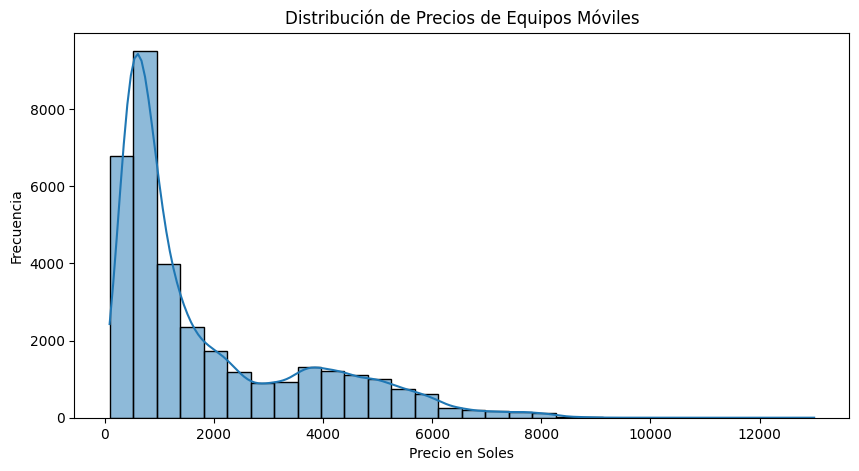

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# creacion de histograma
plt.figure(figsize=(10,5))
sns.histplot(df["PRECIO_SOLES"], bins=30, kde=True)
plt.xlabel("Precio en Soles")
plt.ylabel("Frecuencia")
plt.title("Distribución de Precios de Equipos Móviles")
plt.show()

**Histograma**
- Mayor cantidad de equipos moviles, con menor precio, en el mercado
- Pocos equipos que exceden el precio de 6000 soles

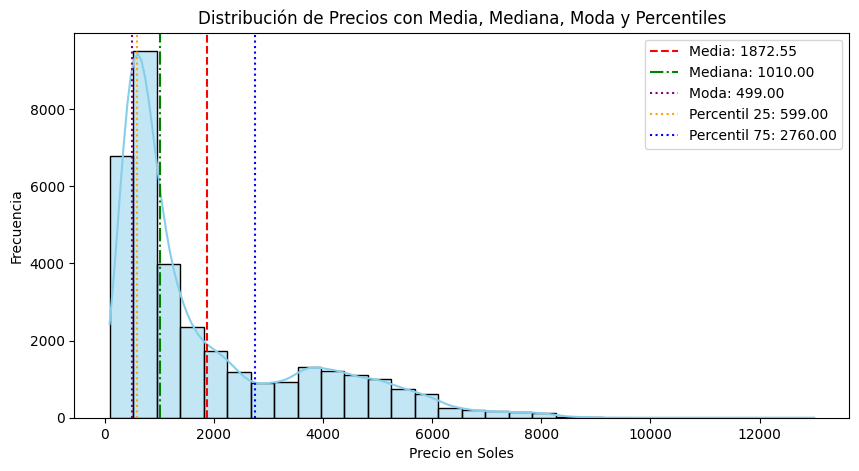

In [49]:
import numpy as np

# calcular medidas estadísticas
media = df["PRECIO_SOLES"].mean()
mediana = df["PRECIO_SOLES"].median()
moda = df["PRECIO_SOLES"].mode()[0]  # Puede haber múltiples modas, tomamos la primera
percentil_25 = np.percentile(df["PRECIO_SOLES"], 25)
percentil_75 = np.percentile(df["PRECIO_SOLES"], 75)

# crear el histograma
plt.figure(figsize=(10,5))
sns.histplot(df["PRECIO_SOLES"], bins=30, kde=True, color="skyblue")

# agregar líneas con estadísticas
plt.axvline(media, color="red", linestyle="--", label=f"Media: {media:.2f}")
plt.axvline(mediana, color="green", linestyle="-.", label=f"Mediana: {mediana:.2f}")
plt.axvline(moda, color="purple", linestyle=":", label=f"Moda: {moda:.2f}")
plt.axvline(percentil_25, color="orange", linestyle="dotted", label=f"Percentil 25: {percentil_25:.2f}")
plt.axvline(percentil_75, color="blue", linestyle="dotted", label=f"Percentil 75: {percentil_75:.2f}")

# personalizar el gráfico
plt.xlabel("Precio en Soles")
plt.ylabel("Frecuencia")
plt.title("Distribución de Precios con Media, Mediana, Moda y Percentiles")
plt.legend()
plt.show()

**Histograma con lineas estadisticas**
- Media (1,872) > mediana (1,010) > moda (499) distribucion sesgada
- 25% de equipos cuestan menos de 599 soles
- 50% menos de 1010 soles
- 75% menos de 2760 soles
- Precio mas comun 499 soles
- Mayor oferta de quipos economicos
- 50% de precios ubicado entre 599 y 2760 soles

In [19]:
# top 10 modelos de equipos con mayor en el mercado
df["EQUIPO_MÓVIL"].value_counts().head(10)

EQUIPO_MÓVIL
iPhone 14            807
iPhone 14 Plus       663
iPhone 14 Pro        630
iPhone 14 Pro Max    585
Galaxy S23 Ultra     557
Galaxy S23           522
iPhone 12            503
iPhone 13            478
iPhone 11            446
Reno 7               418
Name: count, dtype: int64

In [21]:
# top 10 marcas con mayor cantidad en el mercado
df["MARCA"].value_counts().head(10)

MARCA
Samsung     7998
Apple       5658
Motorola    4721
Xiaomi      4167
Honor       2915
ZTE         2711
Oppo        2511
Vivo        1454
Huawei      1221
Realme       520
Name: count, dtype: int64

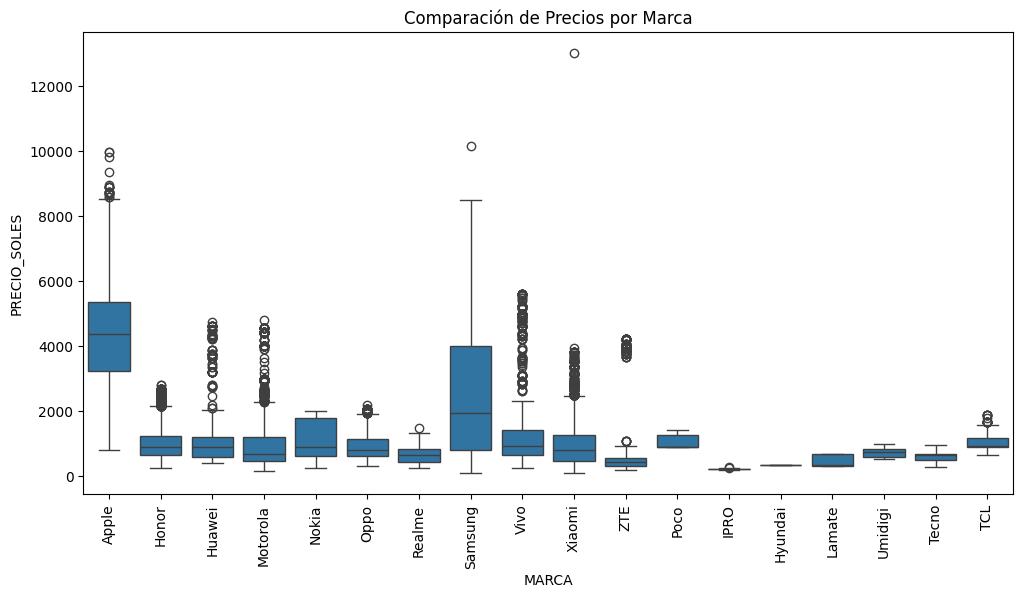

In [22]:
# boxplot para observar los outliers por marca
plt.figure(figsize=(12,6))
sns.boxplot(x="MARCA", y="PRECIO_SOLES", data=df)
plt.xticks(rotation=90)
plt.title("Comparación de Precios por Marca")
plt.show()

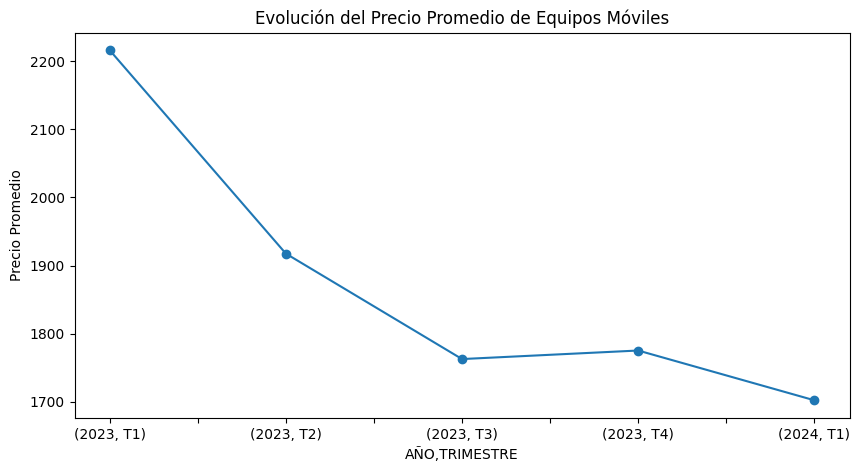

In [34]:
# graficamos le evolucion del precio usando el precio promedio
df.groupby(["AÑO","TRIMESTRE"])["PRECIO_SOLES"].mean().plot(marker="o", figsize=(10,5))
plt.ylabel("Precio Promedio")
plt.title("Evolución del Precio Promedio de Equipos Móviles")
plt.show()

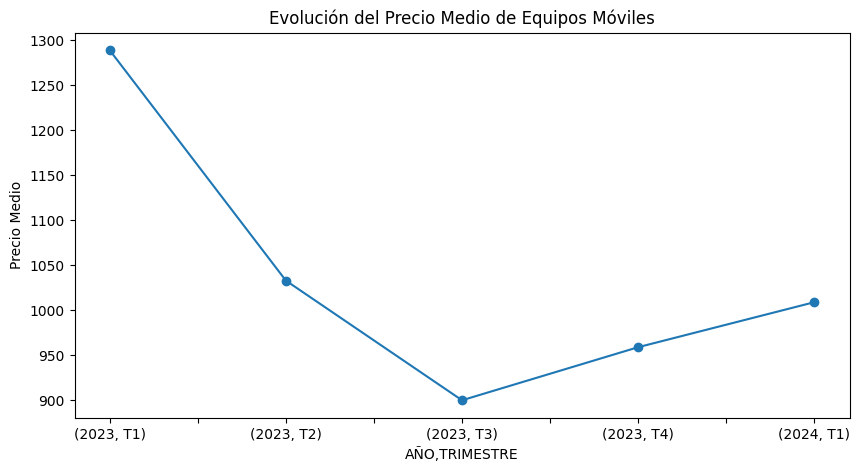

In [48]:
# graficamos le evolucion del precio usando el precio medio
df.groupby(["AÑO","TRIMESTRE"])["PRECIO_SOLES"].median().plot(marker="o", figsize=(10,5))
plt.ylabel("Precio Medio")
plt.title("Evolución del Precio Medio de Equipos Móviles")
plt.show()

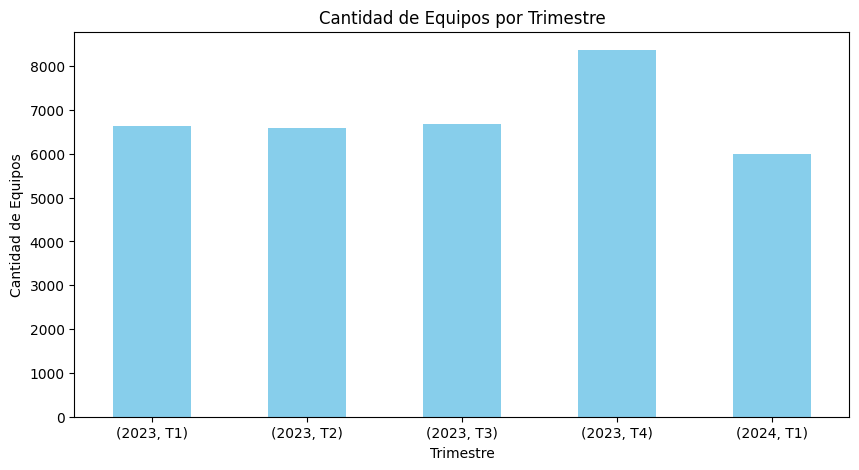

In [35]:
# cantidad de equipos por trimestre
df_trimestre = df.groupby(["AÑO","TRIMESTRE"])["EQUIPO_MÓVIL"].count()

plt.figure(figsize=(10,5))
df_trimestre.plot(kind="bar", color="skyblue")
plt.ylabel("Cantidad de Equipos")
plt.xlabel("Trimestre")
plt.title("Cantidad de Equipos por Trimestre")
plt.xticks(rotation=0)
plt.show()

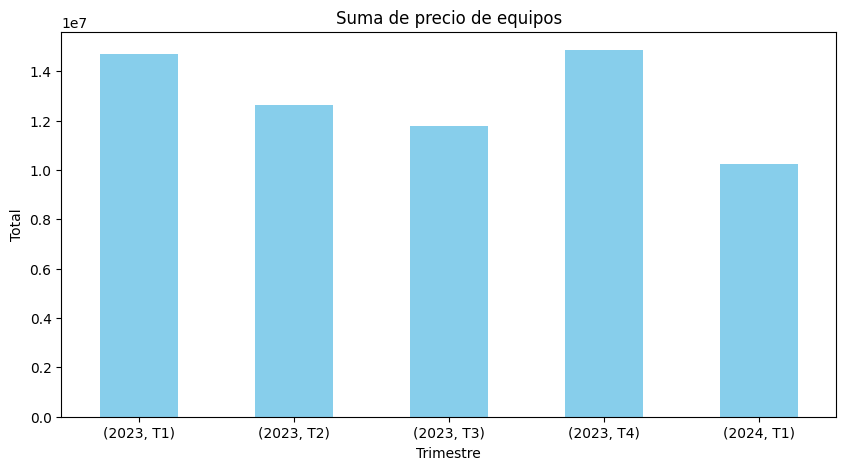

In [38]:
# precios totales por trimestre
df_trimestre_precio = df.groupby(["AÑO","TRIMESTRE"])["PRECIO_SOLES"].sum()

plt.figure(figsize=(10,5))
df_trimestre_precio.plot(kind="bar", color="skyblue")
plt.ylabel("Total")
plt.xlabel("Trimestre")
plt.title("Suma de precio de equipos")
plt.xticks(rotation=0)
plt.show()

In [39]:
# descripcion estadistica de precios por marca
df.groupby("MARCA")["PRECIO_SOLES"].describe()

,count,mean,std,min,25%,50%,75%,max
MARCA,,,,,,,,
Apple,5658.0,4327.987828,1517.203940,819.0,3239.00,4360.0,5349.0,9980.0
Honor,2915.0,1071.132930,602.023472,269.0,639.00,899.0,1249.0,2809.0
Huawei,1221.0,1081.809787,817.090932,399.0,600.00,889.0,1199.0,4749.0
Hyundai,2.0,359.000000,0.000000,359.0,359.00,359.0,359.0,359.0
IPRO,34.0,223.264706,21.607110,199.0,209.00,221.5,229.0,289.0
Lamate,5.0,478.600000,191.547122,329.0,329.00,359.0,688.0,688.0
Motorola,4721.0,919.066511,710.208967,149.0,479.00,679.0,1199.0,4799.0
Nokia,91.0,1146.668132,610.240525,249.0,609.45,889.0,1789.0,1999.0
Oppo,2511.0,930.906651,393.735607,329.0,630.00,800.0,1159.0,2179.0


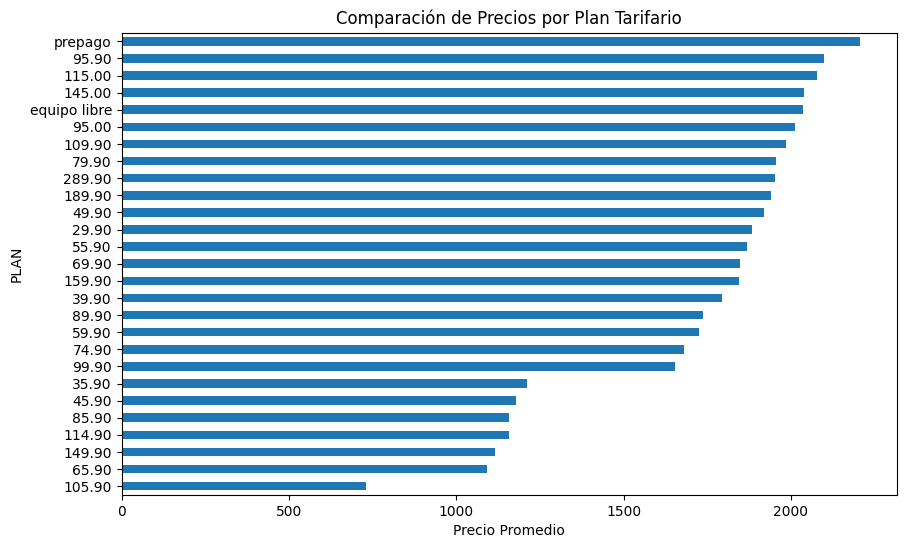

In [52]:
# precio promedio segun plan
df.groupby("PLAN")["PRECIO_SOLES"].mean().sort_values().plot(kind="barh", figsize=(10,6))
plt.xlabel("Precio Promedio")
plt.title("Comparación de Precios por Plan Tarifario")
plt.show()


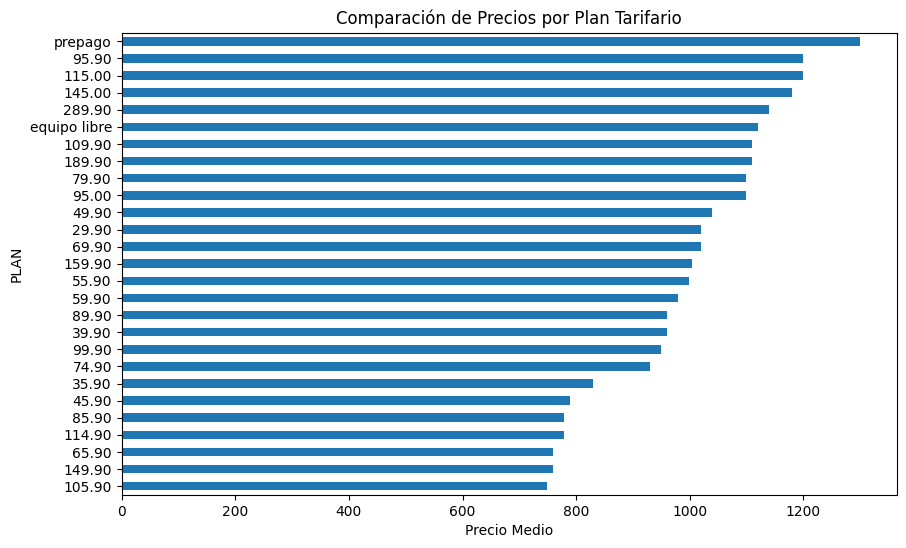

In [54]:
# precio medio segun plan
df.groupby("PLAN")["PRECIO_SOLES"].median().sort_values().plot(kind="barh", figsize=(10,6))
plt.xlabel("Precio Medio")
plt.title("Comparación de Precios por Plan Tarifario")
plt.show()